# Airline Fare Predictions

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
#train_data = pd.read_excel(r"/content/drive/MyDrive/Airline Fair prediction/Data_Train.xlsx")
train_data = pd.read_excel(r"Data_Train.xlsx")

In [6]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# shows very few missing values

In [10]:
train_data.shape

(10683, 11)

In [11]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [12]:
train_data.dropna(inplace = True)

In [13]:
train_data.isnull().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Preprocessing and perform featurization on "Date_of_Journey"

In [14]:
data = train_data.copy()

In [15]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
  change_into_datetime(feature)

c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify in

In [20]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [21]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [22]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [23]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [24]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [25]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [26]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-08-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 05:50:00,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-08-08 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-08-08 18:05:00,2022-08-08 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-08-08 16:50:00,2022-08-08 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [27]:
data.drop('Date_of_Journey', axis = 1, inplace =True)

In [28]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-08-08 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 05:50:00,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


# Your Task :
    Doing Featurization using Map ,Lambda ,Custom function ,string splitting :
    
    Map ,Lambda -->> 
https://www.geeksforgeeks.org/python-map-function/
    
    How to write a function in Python -->> 
https://www.geeksforgeeks.org/python-functions/
    
    String splitting ->> 
https://www.programiz.com/python-programming/methods/string/split
    

# Clean Dep Time and Arrival Time and featurize it

In [29]:
def extract_hour_min(df,col):
  df[col + "_hour"] = df[col].dt.hour
  df[col + "_minute"] =df[col].dt.minute
  df.drop(col, axis = 1, inplace = True)
  return df.head(2)

In [30]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [31]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


# lets analyse when will most of the flights will take-off

In [32]:
def flight_dep_time(x):
  if (x>4) & (x<8):
    return 'Early Morning'

  elif (x>8) & (x<12):
    return 'Morning'

  elif (x>12) & (x<16):
    return 'Noon'
  
  elif (x>16) & (x<20):
    return 'Evening'

  elif (x>20) & (x<24):
    return 'Night'

  else:
    return 'Late Night'


In [33]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4           Late Night
             ...      
10678          Evening
10679       Late Night
10680       Late Night
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [34]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Late Night       2463
Early Morning    2183
Morning          2031
Evening          1706
Noon             1259
Night            1040
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

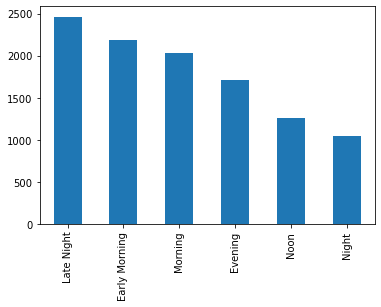

In [35]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [36]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement chart_studio (from versions: none)
ERROR: No matching distribution found for chart_studio


# lets use Cufflinks & plotly to make your visuals more interactive !

In [37]:
!pip install plotly

In [89]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.Collecting colorlover>=0.2.1

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=457f0e88d49f0a246f8acfd279589526b30d35c72ebabb57a327233683012763
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [90]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [91]:
cf.go_offline()

<AxesSubplot:>

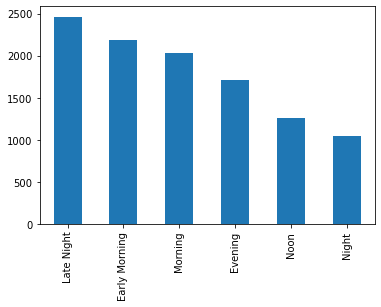

In [92]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar")

In [ ]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind = "bar")

## Your Task :
Doing Featurization of Arrival_Time using Map ,Lambda ,Custom function  ,for loop  :

Map ,Lambda -->> 
https://www.geeksforgeeks.org/python-map-function/

How to write a function in Python -->> 
https://www.geeksforgeeks.org/python-functions/

For loop in python:
https://www.quora.com/What-does-for-loop-in-python-means

# Pre Process Duration Feature and Extract meaningful feature from it

In [40]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [64]:
def preprocess_duration(x):
    
    if 'h' not in x:
        x = '0h ' + x
        
    elif 'm' not in x:
        x = x + ' 0m' 
    return x

In [70]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [71]:
data['Duration'][0].split(' ')

['2h', '50m']

In [72]:
data['Duration'][0].split(' ')[0:2]

['2h', '50m']

In [73]:
data['Duration'][0].split(' ')[0]

'2h'

In [74]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [75]:
data['Duration'][0].split(' ')[1]

'50m'

In [76]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [77]:
data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [78]:
data['Duration_hours'] = data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [80]:
data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

In [79]:
data['Duration_minutes'] = data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [86]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0


## Lets Analyse whether Duration impacts on Price or not ?

In [96]:
'2*60+50*1'

'2*60+50*1'

In [97]:
### eval is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.
eval('2*60+50*1')

170

In [98]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [111]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45,285
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,2,25,145
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15,7,50,470


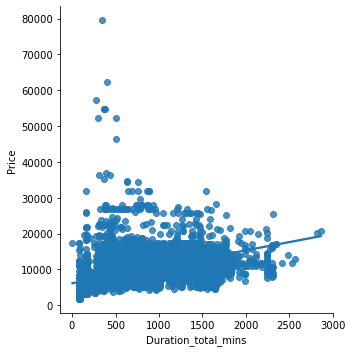

In [101]:
#### It Plot data and regression model fits across a FacetGrid.. (combination of 'regplot` and :class:`FacetGrid)
#### its a extended form of scatter plot..

sns.lmplot(x='Duration_total_mins',y='Price',data=data)



 Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

## Which City has maximum final destination of flights ?

In [104]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [105]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:>

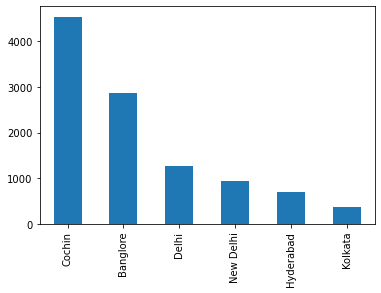

In [106]:
data['Destination'].value_counts().plot(kind = "bar")

<AxesSubplot:ylabel='Destination'>

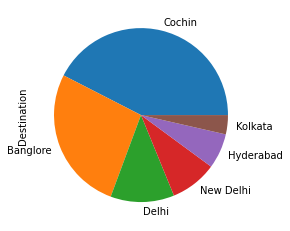

In [107]:
data['Destination'].value_counts().plot(kind = "pie")

In [108]:
'''
Inference->> 
Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

'''

'\nInference->> \nFinal destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,\n\n'

## Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights
    Problem Statement-->> on which route Jet Airways is extremely used???

In [109]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [122]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

<AxesSubplot:xlabel='Route'>

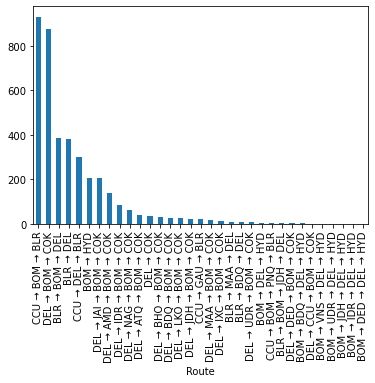

In [126]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False).plot(kind = "bar")

In [124]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False).iplot(kind = "bar")

## Airline vs Price Analysis
    ie finding price distribution & 5-point summary of each Airline..

<AxesSubplot:xlabel='Airline', ylabel='Price'>

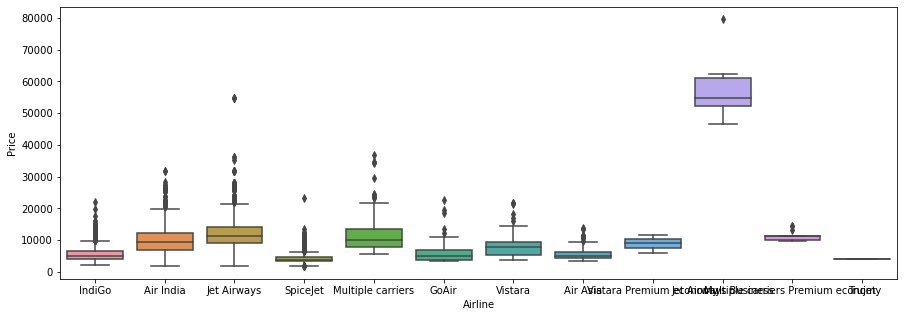

In [129]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

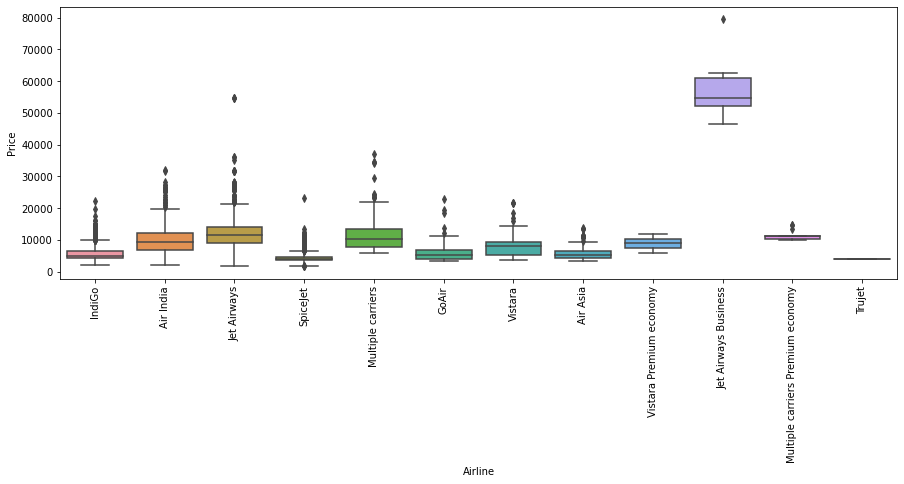

In [130]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

When we need boxplot + distribution both , its good to consider violinplot..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

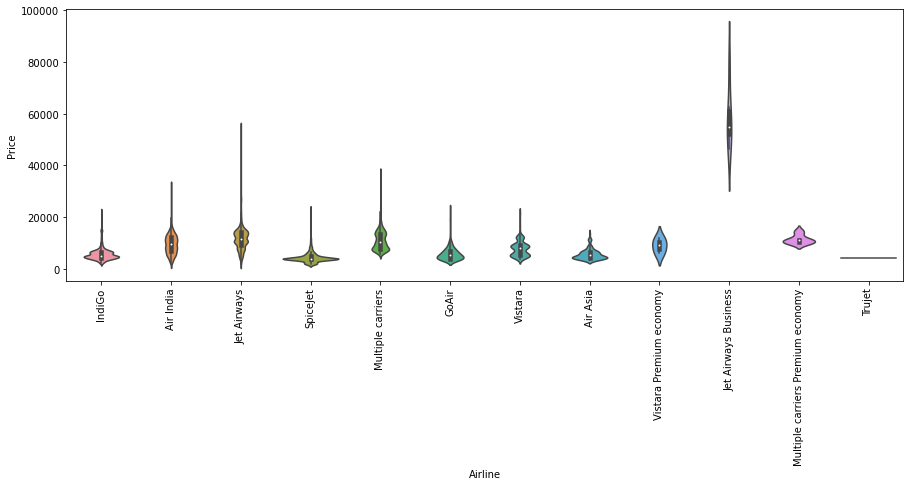

In [132]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

## Lets Perform Feature-Encoding on Data !
    Applying one-hot on data !

Conclusion--> From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

In [133]:
## but lets remove some of the un-necessary features !

In [135]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [136]:
data['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [137]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [138]:
data['Additional_Info'].value_counts() / len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [139]:
np.round(data['Additional_Info'].value_counts() / len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [140]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column
## lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"

data.drop(columns=['Additional_Info', 'Route', 'journey_year', 'Duration_total_mins'], axis = 1, inplace = True)

In [141]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_minutes'],
      dtype='object')

In [143]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


## Lets separate categorical data & numerical data !
    categorical data are those whose data-type is 'object'
    Numerical data are those whose data-type is either int of float

In [144]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [145]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [146]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

## Handling Categorical Data
    We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
    if data belongs to Nominal data (ie data is not in any order) -->> OneHotEncoder is used in this case
    if data belongs to Ordinal data (ie data is in order ) -->>       LabelEncoder is used in this case

    But in real-world , it is not necessary that u have to always One-hot or label , hence we will discuss more interesting approaches to do this !

### Lets apply one-hot encoding on 'Source' feature !

In [147]:
### One-hot from scratch :

In [148]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [149]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [150]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [151]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [154]:
for category in data['Source'].unique():
    data['Source_' + category]  = data['Source'].apply(lambda x: 1 if x==category else 0)

In [155]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


## Performing Target Guided Mean Encoding !
    ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..
    lets use Target Guided Mean Encoding in order to get rid of this..

In [156]:
data.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [158]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [160]:
{key:index for index,key in enumerate(airlines,0)}

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [161]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [162]:
data['Airline'] = data['Airline'].map(dict1)

In [163]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


In [164]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [165]:
data['Destination'].replace("New Delhi", "Delhi", inplace=True)

In [166]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [170]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [171]:
dict2={key:index for index,key in enumerate(dest,0)}

In [172]:
data['Destination'] = data['Destination'].map(dict2)

In [174]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [175]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


In [176]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [178]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [180]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

In [181]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [182]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0


## Performing Outlier Detection !
    Here the list of data visualization plots to spot the outliers.
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.
5. QQ plot

CAUSE FOR OUTLIERS
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
* Natural Outlier:- When an outlier is not artificial (due to error), it is a natural outlier. Most of real world data belong to this category.

In [183]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)
    

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



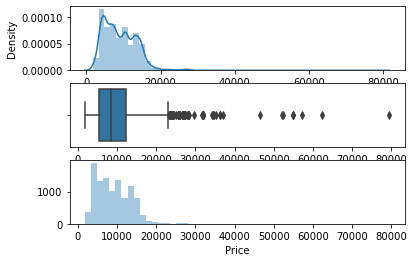

In [185]:
plot(data,'Price')

### Getting a high level over-view of various ways to deal with outliers:


Again there are various ways to deal with outliers :


1..Statistical imputation , ie impute it with mean , median or mode of data..

a..Whenever ur data is Gaussian Distributed ,use 3 std dev approach to remove outliers in such case
     ie we will use u+3*sigma & u-3*sigma
        data pts greater than upper_boundary( u+3*sigma) are my outliers 
            & data pts which are less than lower_boundary(u-3*sigma) are my outliers

        Above approach is known as Z-score & it has a extended version known as Robust z-score..
        Robust Z-score is also called as Median absolute deviation method. 
        It is similar to Z-score method with some changes in parameters.


b..If Features Are Skewed We Use the below Technique which is IQR
    Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
     where IQR=75th%ile data - 25th%ile data

     & IQR +- 1.5 IQR  will be changed depending upon the domain ie it may be IQR + 3IQR 


       Extended version of above is WINSORIZATION METHOD(PERCENTILE CAPPING)..
       This method is similar to IQR method. It says -->> 

       Data points that are greater than 99th percentile and data points that are below tha 1st percentile 
       are treated as outliers.



 c..If we have huge high dimensional data , then it is good to perform isolation forest...
     It is a clustering algo which works based on decision tree and it isolate the outliers.
     It classify the data point to outlier and not outliers..
         If the result is -1, it means that this specific data point is an outlier. 
         If the result is 1, then it means that the data point is not an outlier.






So we have tonnes of ways to deal with outliers..
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])
plot(data,'Price')

data.head(2)
data.drop(columns=['Source','Duration'],axis=1,inplace=True)
data.head(2)
data.dtypes


In [187]:
np.where(data['Price']>35000, data['Price'].median(), data['Price'])

array([ 3897.,  7662., 13882., ...,  7229., 12648., 11753.])

In [188]:
data['Price'] = np.where(data['Price']>35000, data['Price'].median(), data['Price'])

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



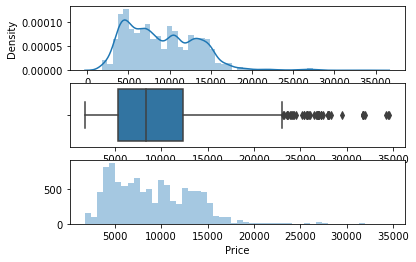

In [189]:
plot(data,'Price')

In [190]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [191]:
data.drop(columns = ['Source', 'Duration'], axis =1 , inplace = True)

In [192]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [193]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_minutes         int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

## Performing Feature Selection !


Finding out the best feature which will contribute most to the target variable. 
Lets get a high level overview of most of the frequently used feature selection technique..


Why to apply Feature Selection?
To select important features to get rid of curse of dimensionality ie..to get rid of duplicate features


ways or technqiues to do it if we have regression use-case
a..SelectKBest
    Score function:
    
    For regression: f_regression, mutual_info_regression

    f_regression
    Its backbone is pearson co-relation.. 


    mutual_info_regression 
    Its Backbone is Various statistical test like Chi-sq,Anova & p-value.


b..ExtraTreesClassifier
   This technique gives you a score for each feature of your data,the higher the score more relevant it is




In [197]:
from sklearn.feature_selection import mutual_info_regression

In [194]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [195]:
data.drop('Price',axis = 1) # we hadn't used inplace so it will not update dataset

,Airline,Destination,Total_Stops,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,3,1,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,2,1,3,1,16,50,21,35,4,45,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4,9,19,55,22,25,2,30,0,1,0,0,0
10679,7,3,0,27,4,20,45,23,20,2,35,0,1,0,0,0
10680,10,2,0,27,4,8,20,11,20,3,0,1,0,0,0,0
10681,5,2,0,3,1,11,30,14,10,2,40,1,0,0,0,0


In [196]:
X = data.drop('Price',axis = 1)
y = data['Price']

In [201]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
Duration_hours         int64
Duration_minutes       int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [198]:
 mutual_info_regression(X,y)

array([0.97511952, 0.99730081, 0.79476933, 0.19331983, 0.24088054,
       0.3474188 , 0.25895495, 0.39111445, 0.33950175, 0.46088814,
       0.35460858, 0.38932072, 0.45835759, 0.53204123, 0.13843082,
       0.19142983])

In [203]:
imp = pd.DataFrame( mutual_info_regression(X,y), index = X.columns)
imp.columns = ['Importance']

In [204]:
imp.sort_values(by = 'Importance', ascending = False)

,Importance
Destination,1.004630
Airline,0.972630
Total_Stops,0.785375
Source_Delhi,0.517263
Duration_hours,0.463329
Source_Kolkata,0.447967
Arrival_Time_hour,0.400113
Source_Banglore,0.382009
Arrival_Time_minute,0.344657
Dep_Time_hour,0.340328


## Lets build ML Model  , then later on we can think of saving it..

#### Split dataset into train & test

In [213]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.25,random_state=42)

#### what we often do in modelling:
    a..Initially ,lets build basic random forest model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [221]:
ml_model=RandomForestRegressor()

In [222]:
model = ml_model.fit(X_train,y_train)

In [223]:
y_pred=model.predict(X_test)

In [224]:
y_pred

array([16625.5 ,  6372.85,  8803.3 , ...,  3557.84,  6365.44,  6954.37])

In [225]:
y_pred.shape

(2671,)

In [226]:
len(X_test)

2671

### How to save ML model into disk

lets try to dump ml model using pickle & joblib..
advantage of dumping--
imagine in future we have new data ,& lets say we have to predict price on this huge data

then just for this new data , we have to execute all the above cells follow the entire pipeline,  then only we are able to predict on this...


so to get rid of such issue , will just dump it to reuse it again & again..
what does this file store??
this save coefficients of our model.. not an entire dataset

In [228]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [229]:
import pickle

In [230]:
file=open(r'D:\Flight_Price\Datasets/rf_random.pkl','wb')